In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data.head()
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')



now, I'm trying to understand the data and visualise it. Also, selecting the features.

using re or list trying to find position of zero/null values.

In [3]:
train_data.shape

y=train_data.isnull().sum().sort_values( ascending=False).to_frame()
for i,j in y.iterrows():
    #if()
    if(int(j)>0):
        print(str(i),str(j))
#print(y)
#print(x)
#for i in range(len(x)):
 #   if(x[i]>0):
  #      print(train_data.isnull().sum())
#if any((match := pattern.match(x)) for x in items):
 #   print(match.group(0))
  #      print(x[i])

PoolQC 0    1453
Name: PoolQC, dtype: int64
MiscFeature 0    1406
Name: MiscFeature, dtype: int64
Alley 0    1369
Name: Alley, dtype: int64
Fence 0    1179
Name: Fence, dtype: int64
FireplaceQu 0    690
Name: FireplaceQu, dtype: int64
LotFrontage 0    259
Name: LotFrontage, dtype: int64
GarageCond 0    81
Name: GarageCond, dtype: int64
GarageType 0    81
Name: GarageType, dtype: int64
GarageYrBlt 0    81
Name: GarageYrBlt, dtype: int64
GarageFinish 0    81
Name: GarageFinish, dtype: int64
GarageQual 0    81
Name: GarageQual, dtype: int64
BsmtExposure 0    38
Name: BsmtExposure, dtype: int64
BsmtFinType2 0    38
Name: BsmtFinType2, dtype: int64
BsmtFinType1 0    37
Name: BsmtFinType1, dtype: int64
BsmtCond 0    37
Name: BsmtCond, dtype: int64
BsmtQual 0    37
Name: BsmtQual, dtype: int64
MasVnrArea 0    8
Name: MasVnrArea, dtype: int64
MasVnrType 0    8
Name: MasVnrType, dtype: int64
Electrical 0    1
Name: Electrical, dtype: int64


Looking at the data, i understood that certain rows that have values many null values can be ignored.

In [4]:
test_data.shape

y=test_data.isnull().sum().sort_values(ascending=False).to_frame()
for i,j in y.iterrows():
    #if()
    if(int(j)>0):
        print(str(i),str(j))

PoolQC 0    1456
Name: PoolQC, dtype: int64
MiscFeature 0    1408
Name: MiscFeature, dtype: int64
Alley 0    1352
Name: Alley, dtype: int64
Fence 0    1169
Name: Fence, dtype: int64
FireplaceQu 0    730
Name: FireplaceQu, dtype: int64
LotFrontage 0    227
Name: LotFrontage, dtype: int64
GarageCond 0    78
Name: GarageCond, dtype: int64
GarageQual 0    78
Name: GarageQual, dtype: int64
GarageYrBlt 0    78
Name: GarageYrBlt, dtype: int64
GarageFinish 0    78
Name: GarageFinish, dtype: int64
GarageType 0    76
Name: GarageType, dtype: int64
BsmtCond 0    45
Name: BsmtCond, dtype: int64
BsmtQual 0    44
Name: BsmtQual, dtype: int64
BsmtExposure 0    44
Name: BsmtExposure, dtype: int64
BsmtFinType1 0    42
Name: BsmtFinType1, dtype: int64
BsmtFinType2 0    42
Name: BsmtFinType2, dtype: int64
MasVnrType 0    16
Name: MasVnrType, dtype: int64
MasVnrArea 0    15
Name: MasVnrArea, dtype: int64
MSZoning 0    4
Name: MSZoning, dtype: int64
BsmtHalfBath 0    2
Name: BsmtHalfBath, dtype: int64
Util

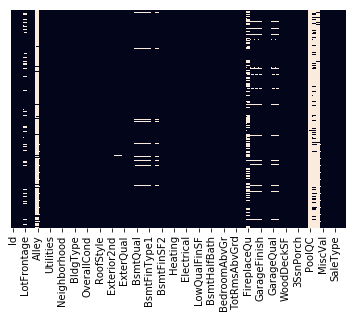

In [5]:

sb.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [6]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data.drop(['MiscFeature'],axis=1,inplace=True)
train_data.drop(['PoolQC'],axis=1,inplace=True)
train_data.drop(['Alley'],axis=1,inplace=True)


In [7]:
#train_data['Fence']
train_data.drop(['Fence'],axis=1,inplace=True)
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])


In [8]:
train_data.shape
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])

In [9]:
train_data['FireplaceQu'].value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [10]:
train_data.shape

y=train_data.isnull().sum().sort_values( ascending=False).to_frame()

for i,j in y.iterrows():
    #if()
    if(int(j)>0):
        print(str(i),str(j))

BsmtFinType2 0    38
Name: BsmtFinType2, dtype: int64
BsmtExposure 0    38
Name: BsmtExposure, dtype: int64
BsmtQual 0    37
Name: BsmtQual, dtype: int64
BsmtFinType1 0    37
Name: BsmtFinType1, dtype: int64
BsmtCond 0    37
Name: BsmtCond, dtype: int64
MasVnrType 0    8
Name: MasVnrType, dtype: int64
MasVnrArea 0    8
Name: MasVnrArea, dtype: int64
Electrical 0    1
Name: Electrical, dtype: int64


In [11]:
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
train_data['BsmtCond']=train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])


In [12]:
train_data.shape

(1460, 77)

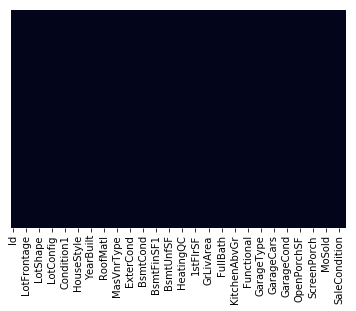

In [13]:
train_data.dropna(inplace=True)
sb.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

all the null values are removed successfully and replaced by the mean, mode or just dropped. Now, performing same procedure on the Test data.

In [14]:

test_data.drop(['PoolQC'],axis=1,inplace=True)
test_data.drop(['MiscFeature'],axis=1,inplace=True)
test_data.drop(['Alley'],axis=1,inplace=True)
test_data.drop(['Fence'],axis=1,inplace=True)


In [15]:
test_data.drop(['FireplaceQu'],axis=1,inplace=True)

In [16]:
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageYrBlt']=test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean())
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean())
test_data['MSZoning']=test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mean())
#test_data['BsmtHalfBat']=test_data['BsmtHalfBat'].fillna(test_data['BsmtHalfBat'].mean())
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mean())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['SaleType']=test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mean())



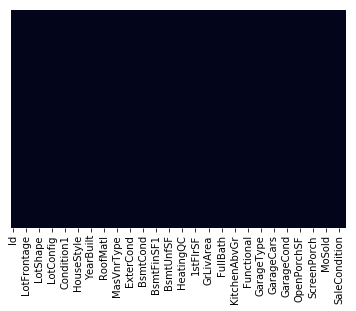

In [17]:
sb.heatmap(train_data.isnull(),yticklabels=False,cbar=False)


Now, I read that we have to manage the categorical fetures. Since, some values in test might not be represented in train or vice versa.


In [18]:
columns=['PoolQC',
'MiscFeature', 'Alley' 
'Fence', 'FireplaceQu' 
,'LotFrontage' 
,'GarageCond', 'GarageQual', 'GarageYrBlt' 
,'GarageFinish' 
,'GarageType'
,'BsmtCond'
,'BsmtQual', 'BsmtExposure'
,'BsmtFinType1' 
,'BsmtFinType2', 'MasVnrType'
,'MasVnrArea', 'MSZoning' 
,'BsmtHalfBath', 'Utilities', 'Functional', 'BsmtFullBath', 'BsmtFinSF2' 
,'BsmtFinSF1', 'Exterior2nd', 'smtUnfSF' ,'TotalBsmtSF' 
,'SaleType' 
,'Exterior1st' 
,'KitchenQual',' GarageArea' 
,'GarageCars'] 


In [29]:
test_data.shape
test_data.to_csv('formulated_csv',index=False)

In [30]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [34]:
main_df=train_data.copy()
test_df=pd.read_csv('kaggle/output/kaggle/working/formulatedtest.csv')

FileNotFoundError: [Errno 2] File b'output/kaggle/working/formulatedtest.csv' does not exist: b'output/kaggle/working/formulatedtest.csv'

try dropping null or median values.